# Project Description and Goals

Zillow is one of the most popular real estate databases online. One of Zillow’s key features is its Zestimates, a popular consumer tool for seeing how much homes are worth.




Zestimates offer users a starting point in home valuation, but these numbers may not be as accurate as one might think for a variety of reasons and there may still be some error.




That is why Zillow's dataset includes the log error information, which is the difference between sales price and estimated price.



### What is driving the errors in Zestimates?

For this project we are working with the Zillow dataset using the 2017 properties and predictions data for single unit / single family homes.

This notebook consists of discoveries made and work that was done related to uncovering what the drivers of the error in the zestimate is.

### Objectives for this project include:
- Identifying the drivers for errors in Zestimates by incorporating clustering methodologies.
- Documenting process and analysis throughout the data science pipeline.
- Demonstrating the information that was discovered.
- Deliverables:
    - README.md file containing overall project information, how to reproduce work, and notes from project planning.
    - Jupyter Notebook Report detailing the pipeline process.
    - Python modules that automate the data acquistion, preparation, and exploration process. 

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial hypotheses
- Is log error  significantly different for properties in LA County vs Orange County vs Ventura County?
- Is there a correlation between square footage of a home and log error?
- Is there a relationship between tax value and log error?
- Could there be clusters in square footage and county location that can help predict log error? 

### Project Imports

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire, prepare, explore, and model
import wrangle as w
import explore as ex
import modeling as m

# statistical testing
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Regression Modeling
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Data Acquisition

In [2]:
df = pd.read_csv('zillow.csv')


In [3]:
w.missing_zero_values_table(df)

Your selected dataframe has 68 columns and 77413 Rows.
There are 63 columns that have NULL values.


,Zero Values,NULL Values,% of Total NULL Values,Total Zero's plus NULL Values,% Total Zero's plus NULL Values,Data Type
buildingclasstypeid,0,77398,100.0,77398,100.0,float64
buildingclassdesc,0,77398,100.0,77398,100.0,object
finishedsquarefeet13,0,77372,99.9,77372,99.9,float64
storytypeid,0,77363,99.9,77363,99.9,float64
storydesc,0,77363,99.9,77363,99.9,object
basementsqft,0,77363,99.9,77363,99.9,float64
yardbuildingsqft26,0,77343,99.9,77343,99.9,float64
fireplaceflag,0,77241,99.8,77241,99.8,float64
architecturalstyletypeid,0,77207,99.7,77207,99.7,float64
architecturalstyledesc,0,77207,99.7,77207,99.7,object


### Findings
- many nulls in columns and rows that need to be removed and/or filled in 
- outliers are present and need to be removed 
    - outliers, tax_value and lot_sqft, removed outside 3 times IQR
- redundant/unnecessary columns can be dropped
- columns can be renamed for better readability
- change datatypes to integers
- create dummy vars for fips
- index can be set to parcelid
- new features can be created for age, tax rate, acres, etc.


# Data Preparation

In [4]:
df = pd.read_csv('wrangled_zillow.csv')

In [5]:
w.missing_zero_values_table(df)

Your selected dataframe has 35 columns and 60240 Rows.
There are 0 columns that have NULL values.


,Zero Values,NULL Values,% of Total NULL Values,Total Zero's plus NULL Values,% Total Zero's plus NULL Values,Data Type
parcelid,0,0,0.0,0,0.0,int64
acres,0,0,0.0,0,0.0,float64
orange_cnty,42482,0,0.0,42482,70.5,int64
ventura_cnty,54661,0,0.0,54661,90.7,int64
log_error_class,0,0,0.0,0,0.0,object
age,0,0,0.0,0,0.0,float64
age_bin,668,0,0.0,668,1.1,float64
taxrate,0,0,0.0,0,0.0,float64
acres_bin,6327,0,0.0,6327,10.5,float64
log_error,0,0,0.0,0,0.0,float64


# Data Exploration

In [6]:
#setting up vars
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty', 'cola']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', \
                    'region_id_city', 'acres_bin', 'sqft_bin',\
                    'structure_dollar_sqft_bin']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'lot_sqft', 'year_built',\
              'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', \
              'age', 'structure_dollar_per_sqft', 'bath_bed_ratio']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

#split data 
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

#scale data
train, validate, test = w.train_validate_test_scale(train, validate, test, quant_vars)

pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=87997080.5, pvalue=1.3267458963794445e-08)
        chi2       p-value  degrees of freedom
0  47.346197  2.933493e-10                   3

expected:
              0            1            2            3
0  6926.525167  6995.380566  6929.803996  6800.290271
1  1523.474833  1538.619434  1524.196004  1495.709729


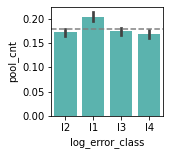


_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=64068624.0, pvalue=0.21249831712877565)
        chi2       p-value  degrees of freedom
0  50.326362  6.807584e-11                   3

expected:
              0            1            2            3
0  7342.086619  7415.073042  7345.562163  7208.278176
1  1107.913381  1118.926958  1108.437837  1087.721824


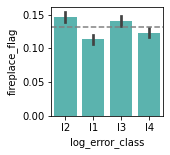


_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=137912549.0, pvalue=0.0003182613425983845)
         chi2       p-value  degrees of freedom
0  328.014803  8.584110e-71                   3

expected:
              0           1            2            3
0  3256.859548  3289.23543  3258.401257  3197.503765
1  5193.140452  5244.76457  5195.598743  5098.496235


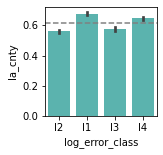


_____________________

orange_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=115817424.0, pvalue=0.006510145490682447)
        chi2       p-value  degrees of freedom
0  269.79682  3.415263e-58                   3

expected:
              0            1            2            3
0  5968.153791  6027.482184  5970.978953  5859.385071
1  2481.846209  2506.517816  2483.021047  2436.614929


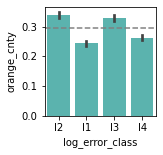


_____________________

ventura_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=46482843.0, pvalue=0.07560888678827839)
        chi2   p-value  degrees of freedom
0  23.955566  0.000026                   3

expected:
             0            1           2            3
0  7674.98666  7751.282386  7678.61979  7535.111164
1   775.01334   782.717614   775.38021   760.888836


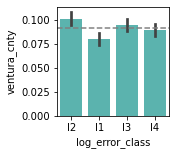


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=96685341.5, pvalue=0.0037242555214341343)
         chi2       p-value  degrees of freedom
0  358.637602  2.010519e-77                   3

expected:
              0            1            2            3
0  6671.026264  6737.341792  6674.184147  6549.447797
1  1778.973736  1796.658208  1779.815853  1746.552203


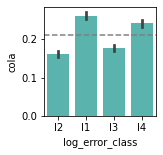


_____________________

bathrooms 
____________________



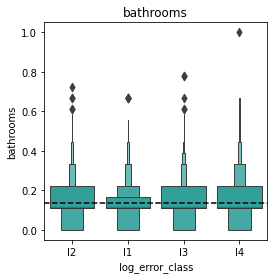

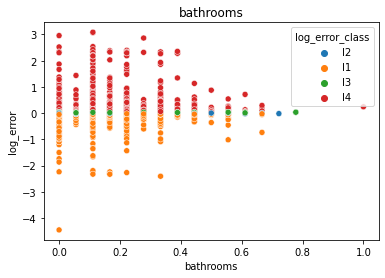

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.123281     0.136103     0.140045     0.139244
std                 0.092577     0.087873     0.089853     0.103876
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.111111     0.111111     0.111111     0.111111
50%                 0.111111     0.111111     0.111111     0.111111
75%                 0.166667     0.222222     0.222222     0.222222
max                 0.666667     0.722222     0.777778     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.055025245922495566, pvalue=4.804765041658385e-24)

____________________

bedrooms 
____________________



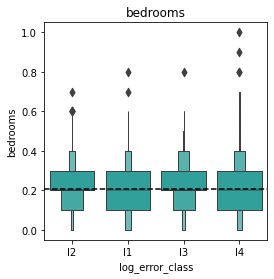

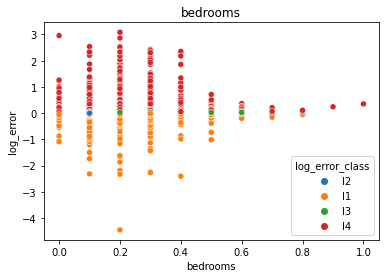

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.199018     0.210698     0.213532     0.213127
std                 0.092019     0.090801     0.094352     0.101347
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.100000     0.200000     0.200000     0.100000
50%                 0.200000     0.200000     0.200000     0.200000
75%                 0.300000     0.300000     0.300000     0.300000
max                 0.800000     0.700000     0.800000     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.050576736525608665, pvalue=1.4728721870184677e-20)

____________________

prop_sqft 
____________________



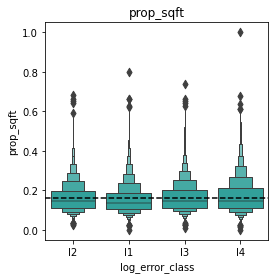

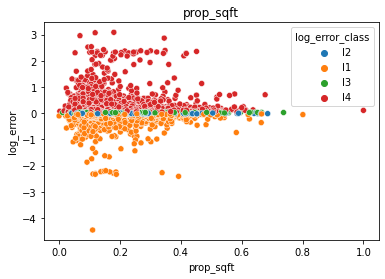

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.155129     0.161555     0.165585     0.171085
std                 0.074033     0.072653     0.075072     0.086557
min                 0.000000     0.027477     0.011440     0.002451
25%                 0.104928     0.110521     0.113381     0.111134
50%                 0.137283     0.144791     0.147651     0.149234
75%                 0.185061     0.195914     0.200613     0.211236
max                 0.801021     0.685291     0.737487     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06698126041850155, pvalue=7.456353383828937e-35)

____________________

lot_sqft 
____________________



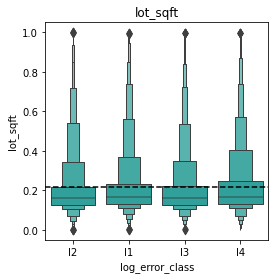

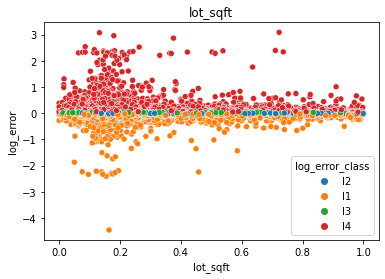

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.220624     0.210963     0.212243     0.226562
std                 0.170144     0.165454     0.165447     0.175887
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.132968     0.128037     0.127881     0.131913
50%                 0.165493     0.162285     0.162709     0.168077
75%                 0.231237     0.217687     0.223179     0.246317
max                 0.999026     1.000000     0.997129     0.998951 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0057478430880526146, pvalue=0.29112107641167295)

____________________

year_built 
____________________



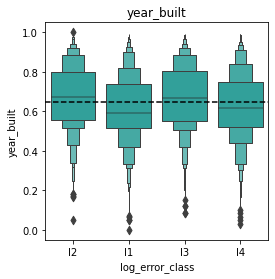

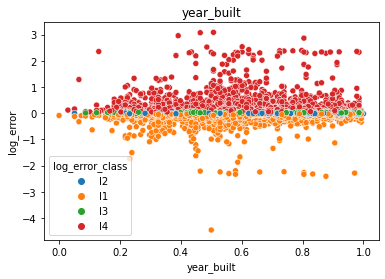

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.614314     0.672903     0.670858     0.626578
std                 0.171046     0.162166     0.164835     0.172134
min                 0.000000     0.050725     0.086957     0.028986
25%                 0.514493     0.557971     0.550725     0.521739
50%                 0.594203     0.673913     0.666667     0.615942
75%                 0.739130     0.797101     0.804348     0.746377
max                 0.992754     1.000000     0.992754     0.992754 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.028141350305491017, pvalue=2.347176711396063e-07)

____________________

struct_tax_value 
____________________



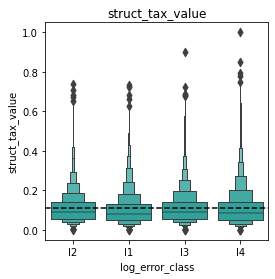

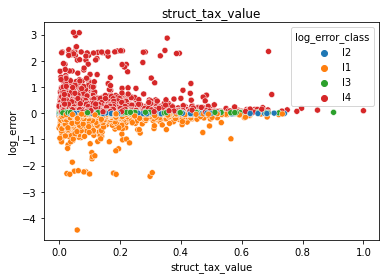

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.103124     0.109767     0.112286     0.110346
std                 0.081258     0.078212     0.082680     0.093512
min                 0.000000     0.000509     0.000588     0.000013
25%                 0.049892     0.057184     0.056460     0.048772
50%                 0.082059     0.090202     0.091409     0.084189
75%                 0.129200     0.139899     0.143405     0.140689
max                 0.733662     0.740325     0.901797     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.013459986591095074, pvalue=0.013428752320237462)

____________________

tax_value 
____________________



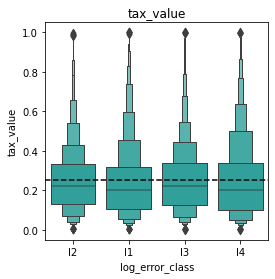

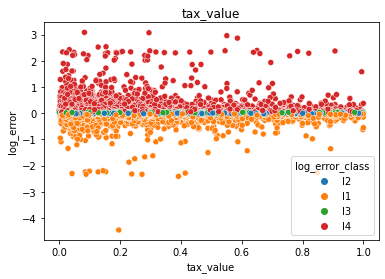

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.243862     0.251912     0.253640     0.252939
std                 0.189271     0.169110     0.174186     0.202984
min                 0.002665     0.002609     0.000769     0.000000
25%                 0.106918     0.131842     0.128318     0.102111
50%                 0.200373     0.225169     0.223959     0.202401
75%                 0.319715     0.331509     0.337608     0.341107
max                 0.999737     0.994862     1.000000     0.999603 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.002611502242537909, pvalue=0.63148844392881)

____________________

land_tax_value 
____________________



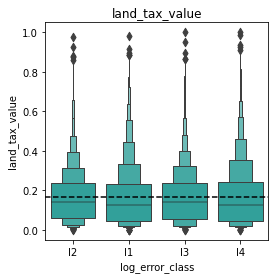

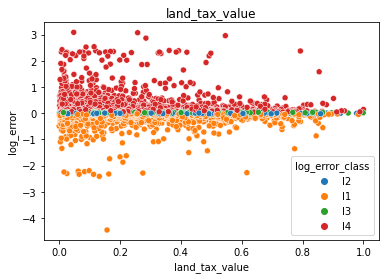

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.166047     0.168149     0.167518     0.168683
std                 0.152525     0.134520     0.136470     0.157595
min                 0.000000     0.002428     0.001767     0.002105
25%                 0.046789     0.062727     0.057936     0.044196
50%                 0.127312     0.143958     0.142180     0.125263
75%                 0.233143     0.237265     0.238530     0.242142
max                 0.983398     0.977682     0.999264     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0063132157373123115, pvalue=0.2462502263982934)

____________________

tax_amount 
____________________



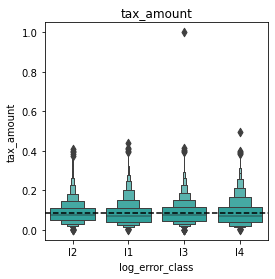

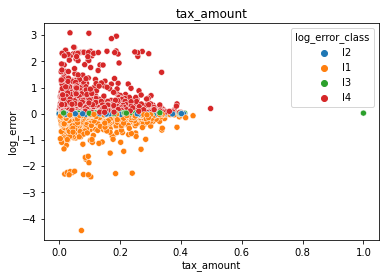

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.085261     0.088024     0.088704     0.087894
std                 0.061910     0.055837     0.058413     0.066471
min                 0.002575     0.000000     0.000180     0.001331
25%                 0.041938     0.049190     0.047646     0.038978
50%                 0.070578     0.077994     0.078182     0.071271
75%                 0.109046     0.112802     0.115795     0.115952
max                 0.440199     0.408968     1.000000     0.497803 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00030257322033183664, pvalue=0.9556835559603484)

____________________

age 
____________________



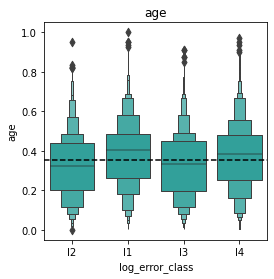

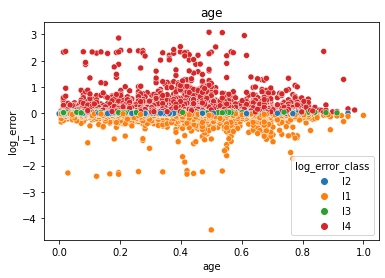

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.385686     0.327097     0.329142     0.373422
std                 0.171046     0.162166     0.164835     0.172134
min                 0.007246     0.000000     0.007246     0.007246
25%                 0.260870     0.202899     0.195652     0.253623
50%                 0.405797     0.326087     0.333333     0.384058
75%                 0.485507     0.442029     0.449275     0.478261
max                 1.000000     0.949275     0.913043     0.971014 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.028141350305491017, pvalue=2.347176711396063e-07)

____________________

structure_dollar_per_sqft 
____________________



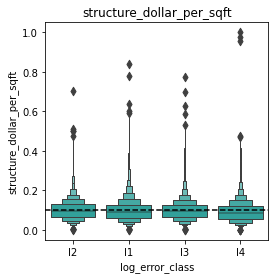

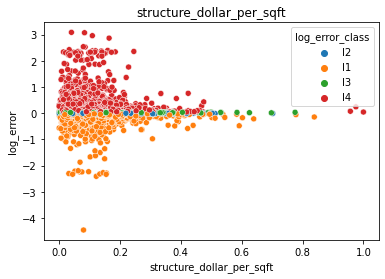

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.099442     0.102211     0.101622     0.095111
std                 0.058406     0.051232     0.053505     0.056272
min                 0.000209     0.001065     0.000188     0.000000
25%                 0.060844     0.067772     0.066449     0.056810
50%                 0.092033     0.096524     0.096156     0.087830
75%                 0.126830     0.129686     0.128890     0.122777
max                 0.838503     0.702014     0.775410     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.03074446727493601, pvalue=1.6241385895681497e-08)

____________________

bath_bed_ratio 
____________________



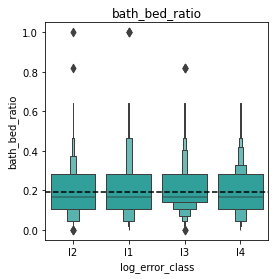

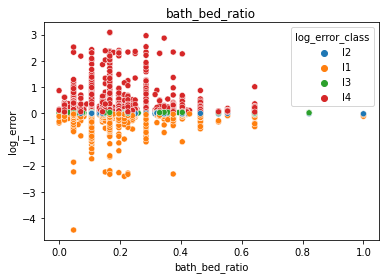

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.190235     0.194380     0.196180     0.194291
std                 0.098514     0.093048     0.092123     0.097209
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.107143     0.107143     0.142857     0.107143
50%                 0.166667     0.166667     0.166667     0.166667
75%                 0.285714     0.285714     0.285714     0.285714
max                 1.000000     1.000000     0.821429     0.642857 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017663172782047487, pvalue=0.0011774147240621428)

____________________



In [7]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=87997080.5, pvalue=1.3267458963794445e-08)
        chi2       p-value  degrees of freedom
0  47.346197  2.933493e-10                   3

expected:
              0            1            2            3
0  6926.525167  6995.380566  6929.803996  6800.290271
1  1523.474833  1538.619434  1524.196004  1495.709729

_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=64068624.0, pvalue=0.21249831712877565)
        chi2       p-value  degrees of freedom
0  50.326362  6.807584e-11                   3

expected:
              0            1            2            3
0  7342.086619  7415.073042  7345.562163  7208.278176
1  1107.913381  1118.926958  1108.437837  1087.721824

_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=137912549.0, pvalue=0.000318261

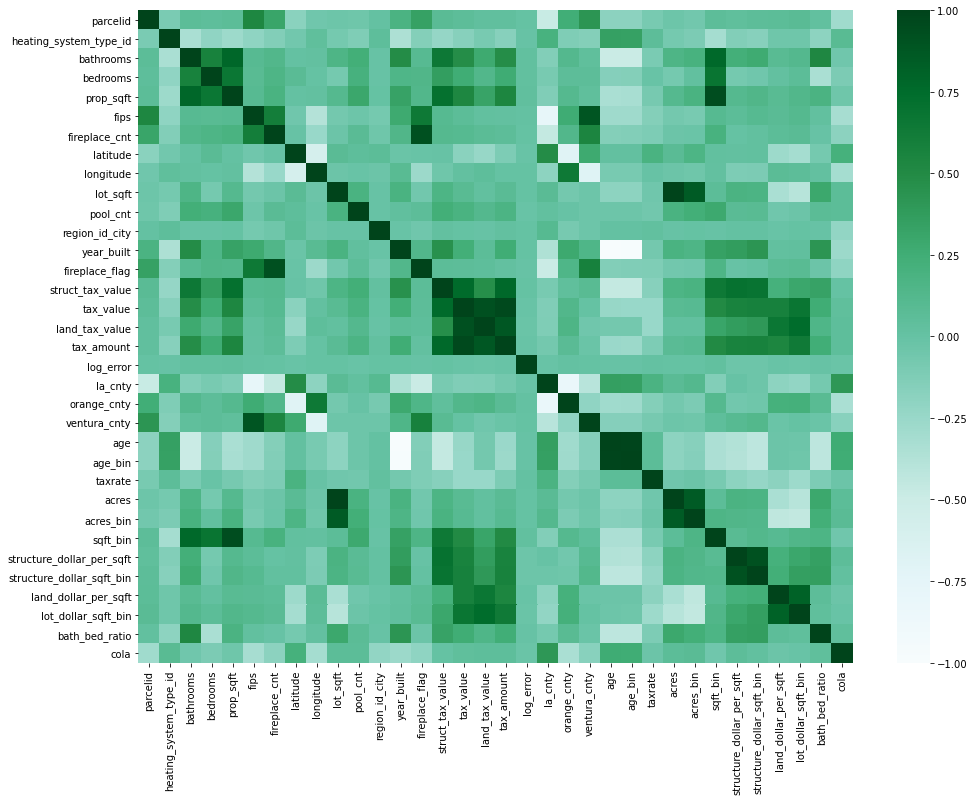

bathrooms 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.055025245922495566, pvalue=4.804765041658385e-24)

____________________
____________________

bedrooms 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.050576736525608665, pvalue=1.4728721870184677e-20)

____________________
____________________

prop_sqft 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.06698126041850155, pvalue=7.456353383828937e-35)

____________________
____________________

lot_sqft 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.0057478430880526146, pvalue=0.29112107641167295)

____________________
____________________

year_built 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.028141350305491017, pvalue=2.347176711396063e-07)

____________________
____________________

struct_tax_value 
____________________

Spearman's Correlation Test

In [8]:
ex.run_stats_on_everything(train, categorical_target, continuous_target, binary_vars, quant_vars)

### Takeaways
- Features with a lot of outliers
    - bathrooms, prop_sqft, lot_sqft, struct_tax_value, tax_value, land_tax_value, tax_amount, and log_error
- Bedrooms appear normally distributed
- latitude and longitude could be good indicators of population density
- log_error does not correlate well with any one feature
    - prop_sqft is the highest
- Because of the lack of correlation, clustering is the next step.

# Data Exploration with Clusters
*data is prescaled*

### 1st Clustering Combination: Clustering for acres and age

In [9]:
#start w/ 2 features
X_scaled = train[['acres', 'age']]
X_scaled.head()

,acres,age
50683,0.080831,0.152174
14963,0.172360,0.268116
45591,0.170248,0.340580
14901,0.207920,0.630435
33308,0.186616,0.413043


Plot interia vs k to find best k value

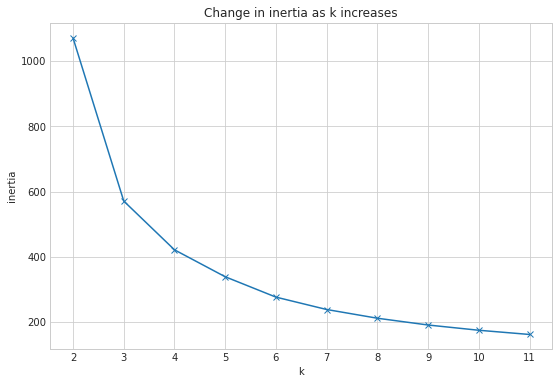

In [10]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

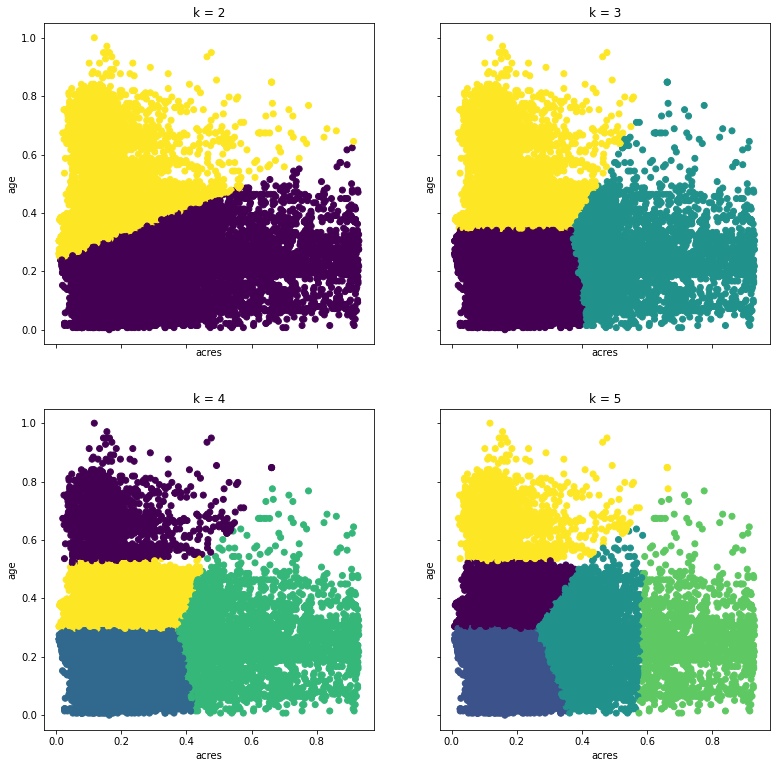

In [12]:
# visualize k for acres and age
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_scaled.acres, X_scaled.age, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='acres', ylabel='age')

Best to choose k = 4 based on elbow method and visualization

In [13]:
# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X_scaled)

# use the thing
X_scaled["cluster"] = kmeans.predict(X_scaled)
X_scaled.head()

,acres,age,cluster
50683,0.080831,0.152174,2
14963,0.172360,0.268116,2
45591,0.170248,0.340580,0
14901,0.207920,0.630435,3
33308,0.186616,0.413043,0


In [14]:
#summary statistics for each cluster
cluster1 = X_scaled[X_scaled.cluster == 0]
cluster2 = X_scaled[X_scaled.cluster == 1]
cluster3 = X_scaled[X_scaled.cluster == 2]
cluster4 = X_scaled[X_scaled.cluster == 3]

X_scaled.groupby("cluster").describe().T

cluster                 0            1             2            3
acres count  15559.000000  3370.000000  10451.000000  4354.000000
      mean       0.167494     0.605922      0.168852     0.154312
      std        0.064154     0.154857      0.077493     0.072488
      min        0.009986     0.374197      0.009986     0.020868
      25%        0.133838     0.470690      0.117057     0.116001
      50%        0.156107     0.570650      0.157599     0.142378
      75%        0.187936     0.723760      0.207679     0.171155
      max        0.442057     0.929477      0.416506     0.661547
age   count  15559.000000  3370.000000  10451.000000  4354.000000
      mean       0.415924     0.254617      0.174638     0.637671
      std        0.058839     0.120631      0.077455     0.075712
      min        0.297101     0.007246      0.000000     0.521739
      25%        0.376812     0.188406      0.108696     0.565217
      50%        0.427536     0.253623      0.188406     0.644928
      75%        0.463768     0.326087      0.239130     0.673913
      max        0.536232     0.775362      0.289855     1.000000

Text(0.5, 1.0, 'Do clusters reveal differences in acres and error?')

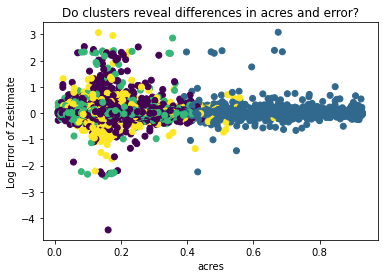

In [15]:
#visualize clusters against target variable log_error
plt.scatter(x = "acres", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('acres')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in acres and error?")

Text(0.5, 1.0, 'Do clusters reveal differences in age and error?')

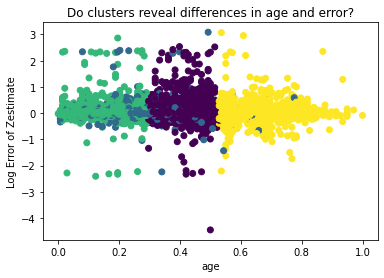

In [16]:
#visualize clusters against target variable log_error
plt.scatter(x = "age", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('age')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in age and error?")

In [18]:
#visualize clusters with centroids
train, X_scaled, scaler, kmeans, centroids = m.create_cluster(train, X_scaled, 4)

In [19]:
centroids

,acres,age,cluster
0,0.167494,0.415924,-9.825474e-15
1,0.605922,0.254617,1.000000e+00
2,0.168852,0.174638,2.000000e+00
3,0.154312,0.637671,3.000000e+00


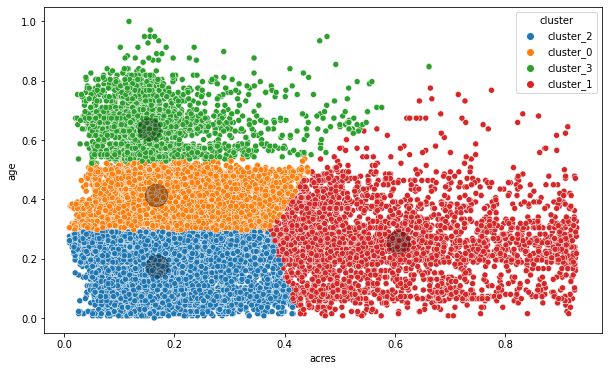

In [20]:
m.create_scatter_plot('acres','age',train,kmeans, X_scaled, scaler)

### 2nd Clustering Combination: Clustering for latitude and longitude


In [21]:
#start w/ 2 features
X_scaled = train[['latitude', 'longitude']]
X_scaled.head()

,latitude,longitude
50683,0.335743,-1.177207
14963,0.340242,-1.184900
45591,0.336748,-1.178230
14901,0.340380,-1.184979
33308,0.341045,-1.177325


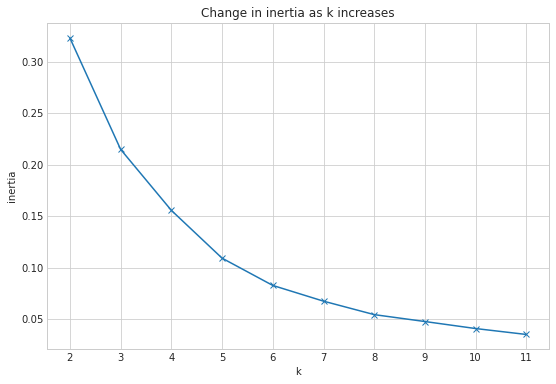

In [22]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

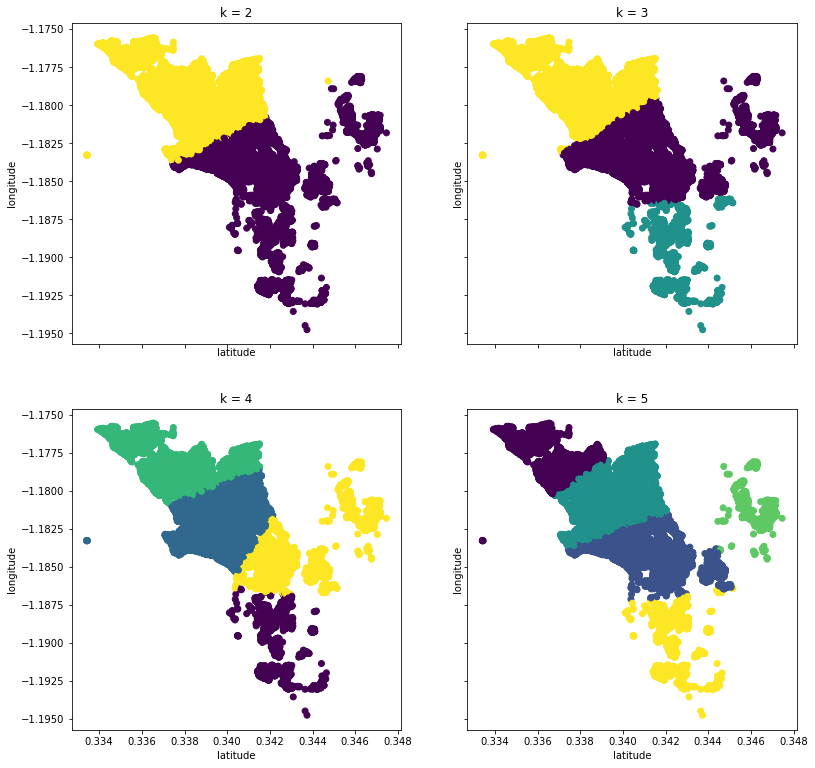

In [23]:
# visualize k for latitude and longitude
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_scaled.latitude, X_scaled.longitude, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='longitude')

In [24]:
# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X_scaled)

# use the thing
X_scaled["cluster"] = kmeans.predict(X_scaled)
X_scaled.head()

,latitude,longitude,cluster
50683,0.335743,-1.177207,0
14963,0.340242,-1.184900,1
45591,0.336748,-1.178230,0
14901,0.340380,-1.184979,1
33308,0.341045,-1.177325,0


In [25]:
#summary statistics for each cluster
cluster1 = X_scaled[X_scaled.cluster == 0]
cluster2 = X_scaled[X_scaled.cluster == 1]
cluster3 = X_scaled[X_scaled.cluster == 2]
cluster4 = X_scaled[X_scaled.cluster == 3]

X_scaled.groupby("cluster").describe().T

cluster                    0            1             2            3
latitude  count  9305.000000  8991.000000  12383.000000  3055.000000
          mean      0.337168     0.342868      0.339525     0.342359
          std       0.001515     0.002039      0.001216     0.000654
          min       0.333923     0.339775      0.333412     0.340102
          25%       0.336158     0.341538      0.338524     0.341864
          50%       0.336938     0.342130      0.339424     0.342284
          75%       0.338115     0.344377      0.340591     0.342730
          max       0.341514     0.347466      0.342058     0.344652
longitude count  9305.000000  8991.000000  12383.000000  3055.000000
          mean     -1.177918    -1.183832     -1.181475    -1.189914
          std       0.001179     0.001672      0.001529     0.001839
          min      -1.180481    -1.186891     -1.184602    -1.194754
          25%      -1.178870    -1.185044     -1.182811    -1.191829
          50%      -1.177872    -1.184190     -1.181390    -1.189715
          75%      -1.176982    -1.182591     -1.180329    -1.188354
          max      -1.175546    -1.178090     -1.177659    -1.186795

Text(0.5, 1.0, 'Do clusters reveal differences in latitude and error?')

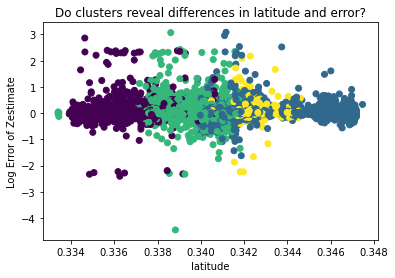

In [26]:
#visualize clusters against target variable log_error
plt.scatter(x = "latitude", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('latitude')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in latitude and error?")

Text(0.5, 1.0, 'Do clusters reveal differences in longitude and error?')

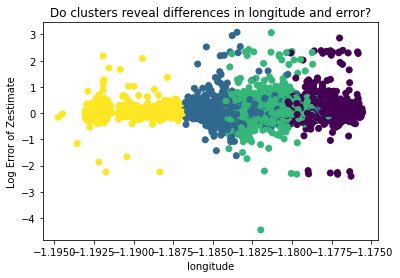

In [27]:
#visualize clusters against target variable log_error
plt.scatter(x = "longitude", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('longitude')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in longitude and error?")

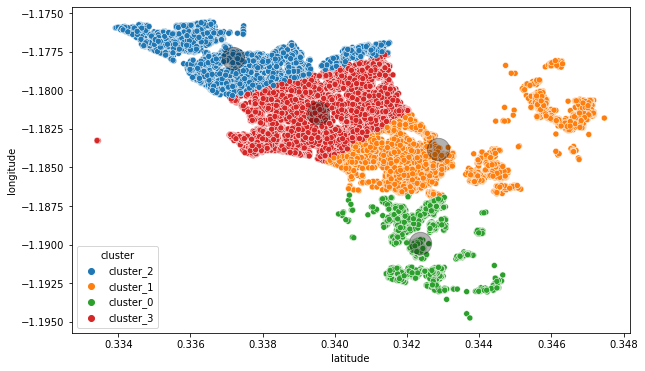

In [29]:
#visualize clusters with centroids
train, X_scaled, scaler, kmeans, centroids = m.create_cluster(train, X_scaled, 4)

m.create_scatter_plot('latitude','longitude',train,kmeans, X_scaled, scaler)

### 3rd Cluster Combination: Clustering for tax_value and prop sq ft

In [30]:
#start w/ 2 features
cluster_cols = ['tax_value','prop_sqft']
X_scaled = train[cluster_cols]
X_scaled.head()

,tax_value,prop_sqft
50683,0.228345,0.095506
14963,0.416406,0.116139
45591,0.495834,0.238917
14901,0.157128,0.316650
33308,0.098856,0.156078


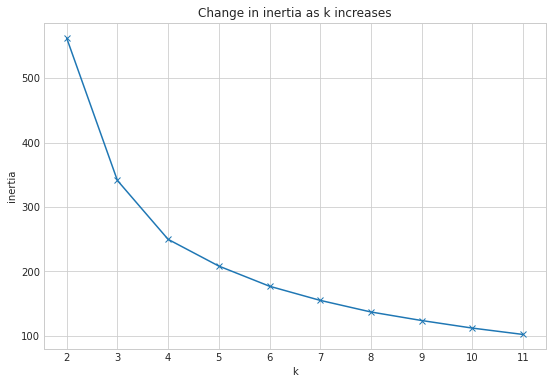

In [31]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

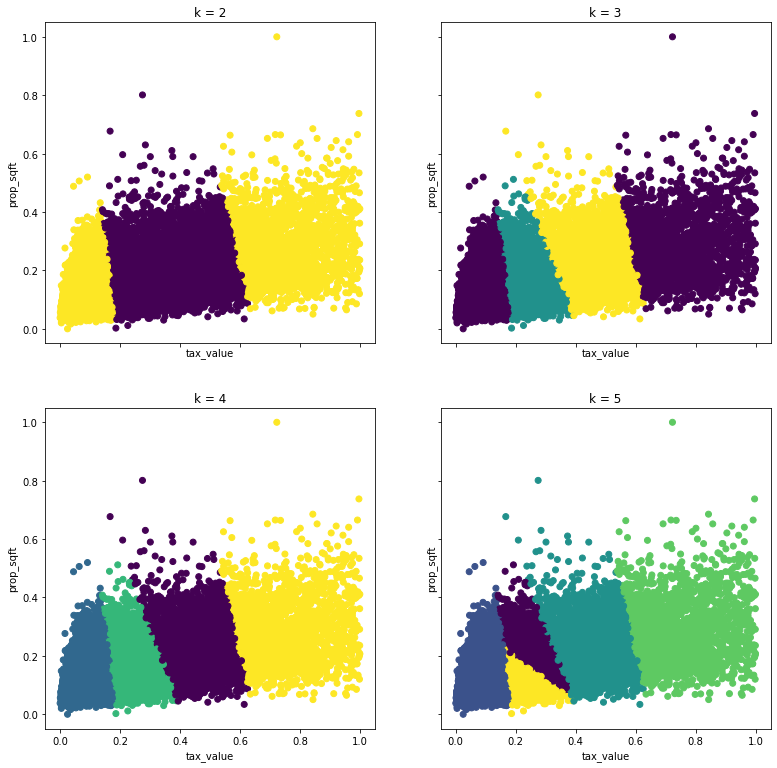

In [34]:
# visualize k for tax value and square feet
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_scaled.tax_value, X_scaled.prop_sqft, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='tax_value', ylabel='prop_sqft')

In [33]:
# Make the kmeans object
kmeans = KMeans(n_clusters=4, random_state=123)

# fit the kmeans model
kmeans.fit(X_scaled)

# use the thing
X_scaled["cluster"] = kmeans.predict(X_scaled)

X_scaled.head()

,tax_value,prop_sqft,cluster
50683,0.228345,0.095506,2
14963,0.416406,0.116139,3
45591,0.495834,0.238917,3
14901,0.157128,0.316650,2
33308,0.098856,0.156078,1


In [35]:
#summary statistics for each cluster
cluster1 = X_scaled[X_scaled.cluster == 0]
cluster2 = X_scaled[X_scaled.cluster == 1]
cluster3 = X_scaled[X_scaled.cluster == 2]
cluster4 = X_scaled[X_scaled.cluster == 3]

X_scaled.groupby("cluster").describe().T

cluster                    0             1             2            3
tax_value count  2028.000000  13098.000000  12623.000000  5985.000000
          mean      0.744973      0.091823      0.248451     0.434988
          std       0.113866      0.046545      0.049518     0.071355
          min       0.539037      0.000000      0.141347     0.166851
          25%       0.647673      0.048349      0.206877     0.379140
          50%       0.726024      0.092355      0.244515     0.424609
          75%       0.829486      0.132896      0.286034     0.487304
          max       1.000000      0.178779      0.387356     0.625333
prop_sqft count  2028.000000  13098.000000  12623.000000  5985.000000
          mean      0.291102      0.130928      0.149518     0.219904
          std       0.109151      0.051853      0.055486     0.077158
          min       0.050358      0.000000      0.002451     0.033912
          25%       0.207482      0.095403      0.111032     0.162206
          50%       0.285546      0.121706      0.138509     0.210317
          75%       0.359270      0.156486      0.176813     0.267824
          max       1.000000      0.519714      0.511849     0.801021

Text(0.5, 1.0, 'Do clusters reveal differences in tax value and error?')

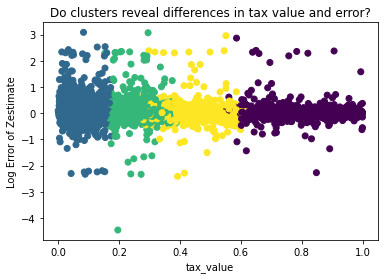

In [36]:
#visualize clusters against target variable log_error
plt.scatter(x = "tax_value", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('tax_value')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in tax value and error?")

Text(0.5, 1.0, 'Do clusters reveal differences in prop sqft and error?')

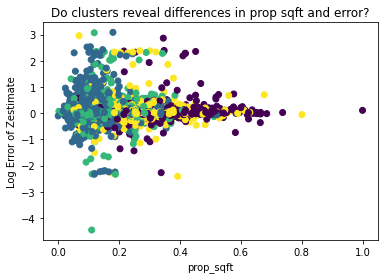

In [37]:
#visualize clusters against target variable log_error
plt.scatter(x = "prop_sqft", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('prop_sqft')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in prop sqft and error?")

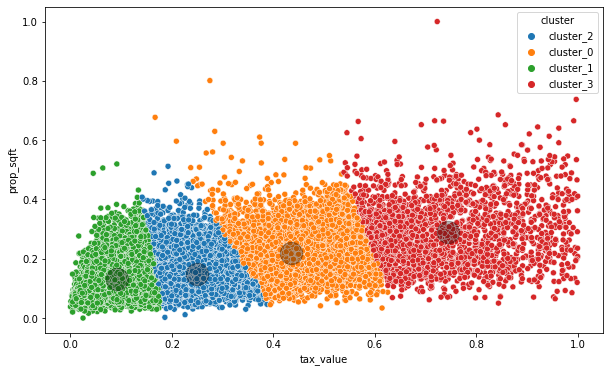

In [38]:
#visualize clusters with centroids
train, X_scaled, scaler, kmeans, centroids = m.create_cluster(train, X_scaled, 4)

m.create_scatter_plot('tax_value','prop_sqft',train,kmeans, X_scaled, scaler)

### Cluster Findings
- Clustering helped in understanding the data even better to select the features for our models.




- **tax_value and prop_sqft**
    - Created 4 clusters
        - low tax low sqft - low end suburbs - lower middle class
        - mid tax low sqft - mid-high end suburbs / low-mid end city - mid-high upper middle class
        - high tax low sqft - high end suburbs and city property - upper middle class+
        - high sqft - large houses all tax groups




- **acres and age**
    - Created 4 clusters
        - young property low-mid acrage - new residential suburban areas
        - mid century property low-mid acrage - mid century suburban and urban
        - old property low-mid acrage - old suburban and urban
        - high acrage - all ages suburban-rural areas




- **latitude and longitude**
    - Created 4 clusters:
        - Clusters follow the general county lines with the exception of cluster in the East.
        - County and location is a strong clustering feature

In [ ]:
# train, validate, test
train['cluster'] = kmeans.predict(train[cluster_cols])
validate['cluster'] = kmeans.predict(validate[cluster_cols])
test['cluster'] = kmeans.predict(test[cluster_cols])